## Imports

In [1]:
%load_ext autoreload
%autoreload 2

%matplotlib inline

In [2]:
from pdpbox import pdp
from plotnine import *

In [3]:
import geopy.distance

In [4]:
from fastai.imports import *
from fastai.structured import *

from pandas_summary import DataFrameSummary
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier
from IPython.display import display

from sklearn import metrics

In [5]:
PATH = "data/BDS_day4/"

In [6]:
!ls {PATH}

data_audi.xlsx


*Question*

estimate the Expected Delivery Time

In [7]:
def split_vals(a,n): return a[:n].copy(), a[n:].copy()
def rmse(x,y): return math.sqrt(((x-y)**2).mean())

def print_score(m):
    res = [rmse(m.predict(X_train), y_train), rmse(m.predict(X_valid), y_valid),
                m.score(X_train, y_train), m.score(X_valid, y_valid)]
    if hasattr(m, 'oob_score_'): res.append(m.oob_score_)
    print(res)
    
def plot_pdp(feat, clusters=None, feat_name=None):
    feat_name = feat_name or feat
    p = pdp.pdp_isolate(m, x, x.columns, feat)
    return pdp.pdp_plot(p, feat_name, plot_lines=True, 
                        cluster=clusters is not None, n_cluster_centers=clusters)
def plot_fi(fi): return fi.plot('cols', 'imp', 'barh', figsize=(12,7), legend=False)

In [8]:
df_raw = pd.read_excel(f'{PATH}data_audi.xlsx', sheet_name='data', parse_dates=["DIMMFIR", "DIMMFIN", "DNAISSA"])

In [9]:
add_datepart(df_raw, 'DIMMFIR')

In [10]:
add_datepart(df_raw, 'DIMMFIN')

In [11]:
add_datepart(df_raw, 'DNAISSA')

In [12]:
train_cats(df_raw)

In [13]:
df, y, nas = proc_df(df_raw) #, max_n_cat=7)

In [15]:
n_trn = 5000

In [16]:
X_train, X_valid = split_vals(df, n_trn)

Index(['B2B', 'B2C'], dtype='object')
count     66735
unique        2
top         B2B
freq      43156
Name: B2BB2C, dtype: object


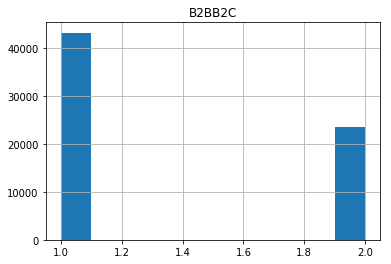

In [36]:
selFld = 'B2BB2C'
print(df_raw[selFld].cat.categories)
print(df_raw[selFld].describe())

plt.show()
plt.title(selFld)
df[selFld].hist()

count    6798.000000
mean     1996.566784
std        41.941157
min      1930.000000
25%      1968.000000
50%      1975.000000
75%      2050.000000
max      2067.000000
Name: DNAISSAYear, dtype: float64


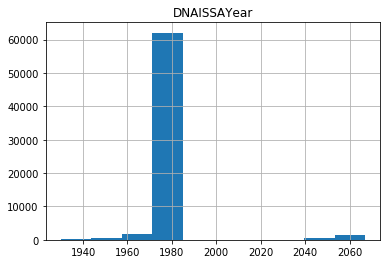

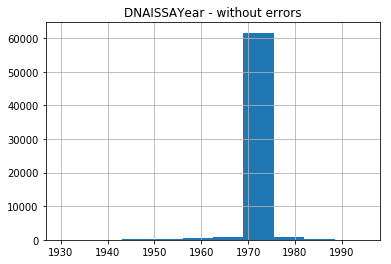

In [50]:
selFld = 'DNAISSAYear'
print(df_raw[selFld].describe())

plt.show()
plt.title(selFld)
df[selFld].hist()

plt.show()
plt.title(selFld+' - without errors')
df[selFld][df[selFld]<2000].hist()

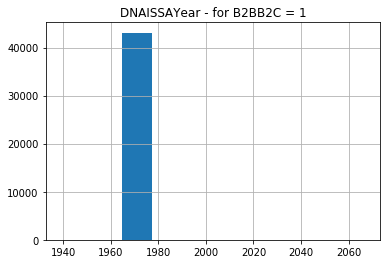

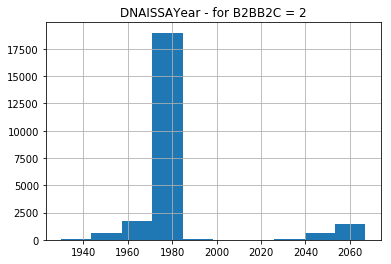

In [46]:
selFld = 'DNAISSAYear'
selFld2 = 'B2BB2C'
value2 = 1

selFld = 'DNAISSAYear'
selFld2 = 'B2BB2C'
value2 = 1

plt.show()
plt.title(selFld+' - for '+selFld2+' = '+str(value2))
df[selFld][df[selFld2]==value2].hist()

value2 = 2

plt.show()
plt.title(selFld+' - for '+selFld2+' = '+str(value2))
df[selFld][df[selFld2]==value2].hist()

Index(['F', 'M'], dtype='object')
count     22638
unique        2
top           M
freq      17886
Name: CSEXEXX, dtype: object


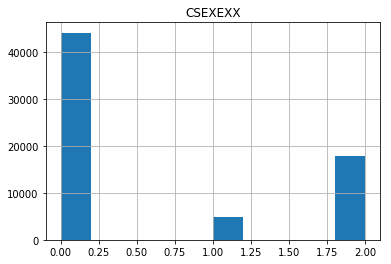

In [49]:
selFld = 'CSEXEXX'
print(df_raw[selFld].cat.categories)
print(df_raw[selFld].describe())

plt.show()
plt.title(selFld)
df[selFld].hist()

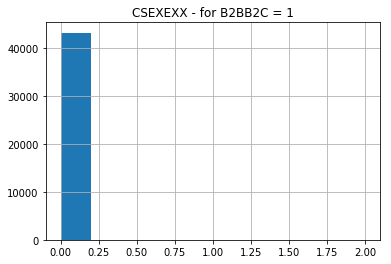

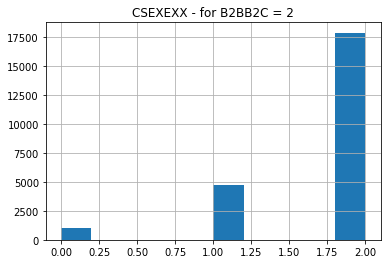

In [48]:
selFld = 'CSEXEXX'
selFld2 = 'B2BB2C'
value2 = 1

plt.show()
plt.title(selFld+' - for '+selFld2+' = '+str(value2))
df[selFld][df[selFld2]==value2].hist()

value2 = 2

plt.show()
plt.title(selFld+' - for '+selFld2+' = '+str(value2))
df[selFld][df[selFld2]==value2].hist()

In [117]:
# predictF = 'CPOSTAL'

# df_raw = pd.read_excel(f'{PATH}data_audi.xlsx', sheet_name='data', parse_dates=["DIMMFIR", "DIMMFIN", "DNAISSA"])

# df_raw[predictF] = np.log(df_raw[predictF])

# add_datepart(df_raw, 'DIMMFIR')
# add_datepart(df_raw, 'DIMMFIN')
# add_datepart(df_raw, 'DNAISSA')

# train_cats(df_raw)
# df, y, nas = proc_df(df_raw, predictF) #, max_n_cat=7)

# n_trn = 12000

# X_train, X_valid = split_vals(df, n_trn)
# y_train, y_valid = split_vals(y, n_trn)

# m = RandomForestRegressor(n_estimators=140, min_samples_leaf=3, max_features=0.5, n_jobs=-1, oob_score=True)
# m.fit(X_train, y_train)
# print_score(m)

In [136]:
predictF = 'PRIX_DIFF_BASE_CAT'

df_raw = pd.read_excel(f'{PATH}data_audi.xlsx', sheet_name='data', parse_dates=["DIMMFIR", "DIMMFIN", "DNAISSA"])

# df_raw[predictF] = np.log(df_raw[predictF])

df_raw.drop(['NCHASSI', 'ID', 'NCLIPRO', 'VPRICAT', 'VPRIBAS', 'VPRIFAC', 'PRIX_REDUCTION_INT', 'PRIX_REDUCTION'], axis=1, inplace=True)

add_datepart(df_raw, 'DIMMFIR')
add_datepart(df_raw, 'DIMMFIN')
add_datepart(df_raw, 'DNAISSA')

train_cats(df_raw)
df, y, nas = proc_df(df_raw, predictF) #, max_n_cat=7)

n_trn = 12000

X_train, X_valid = split_vals(df, n_trn)
y_train, y_valid = split_vals(y, n_trn)

m = RandomForestRegressor(n_estimators=140, min_samples_leaf=3, max_features=0.5, n_jobs=-1, oob_score=True)
m.fit(X_train, y_train)
print_score(m)

[2116.0532729739352, 3935.7686020378774, 0.69167339458782384, 0.25885736335763943, 0.35371721610475493]


In [137]:
fi = rf_feat_importance(m, df); fi[:10]

,cols,imp
1,QCYLIND,0.174197
2,QCARKWS,0.162998
30,DIMMFIRElapsed,0.086993
0,LMODCOUF,0.073597
9,CPOSTAL,0.070923
23,DIMMFIRDayofyear,0.060166
21,DIMMFIRDay,0.059062
12,TYPE_CLIENT,0.040519
7,CTITJUR,0.035056
4,CMODPRO,0.034949


In [138]:
def plot_fi(fi): return fi.plot('cols', 'imp', 'barh', figsize=(12,7), legend=False)

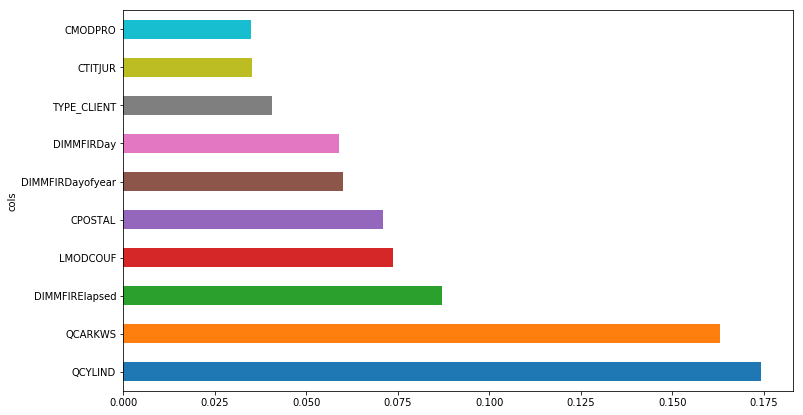

In [139]:
plot_fi(fi[:10])

In [142]:
# predictF = 'PRIX_DIFF_BASE_CAT'

# df_raw = pd.read_excel(f'{PATH}data_audi.xlsx', sheet_name='data', parse_dates=["DIMMFIR", "DIMMFIN", "DNAISSA"])

# add_datepart(df_raw, 'DIMMFIR')
# add_datepart(df_raw, 'DIMMFIN')
# add_datepart(df_raw, 'DNAISSA')

# train_cats(df_raw)
# df, y, nas = proc_df(df_raw, predictF) #, max_n_cat=7)

# n_trn = 12000

# X_train, X_valid = split_vals(df, n_trn)
# y_train, y_valid = split_vals(y, n_trn)

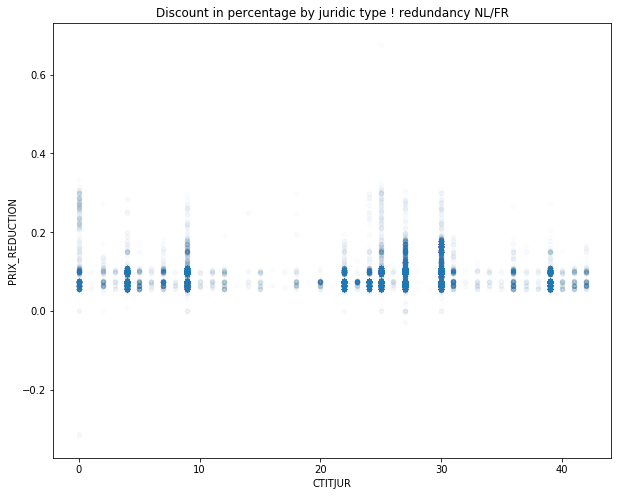

In [147]:
df.plot('CTITJUR','PRIX_REDUCTION', 'scatter', title='Discount in percentage by juridic type ! redundancy NL/FR', alpha=0.01, figsize=(10,8));

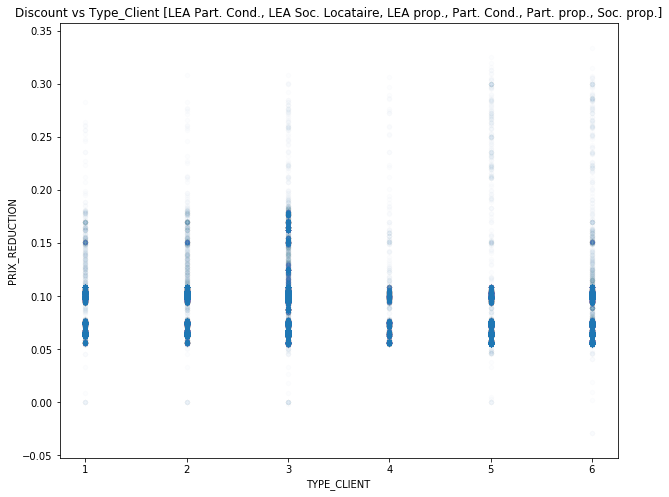

In [161]:
df[(df['PRIX_REDUCTION']<0.6)&(df['PRIX_REDUCTION']>-0.1)].plot('TYPE_CLIENT','PRIX_REDUCTION', 'scatter', title='Discount vs Type_Client [LEA Part. Cond., LEA Soc. Locataire, LEA prop., Part. Cond., Part. prop., Soc. prop.]', alpha=0.01, figsize=(10,8));

Index(['LEA Part. Cond.', 'LEA Soc. Locataire', 'LEA prop.', 'Part. Cond.',
       'Part. prop.', 'Soc. prop.'],
      dtype='object')
count         66735
unique            6
top       LEA prop.
freq          20891
Name: TYPE_CLIENT, dtype: object


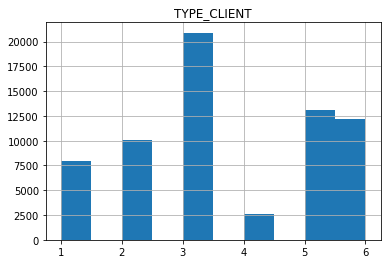

In [156]:
selFld = 'TYPE_CLIENT'
print(df_raw[selFld].cat.categories)
print(df_raw[selFld].describe())

plt.show()
plt.title(selFld)
df[selFld].hist()

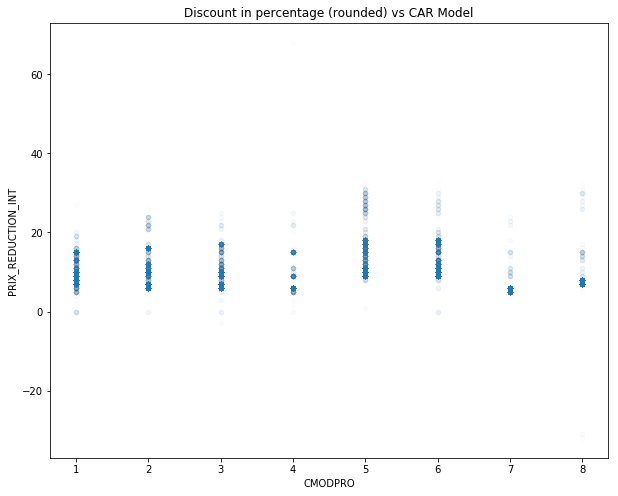

In [155]:
df.plot('CMODPRO','PRIX_REDUCTION_INT', 'scatter', title='Discount in percentage (rounded) vs CAR Model', alpha=0.01, figsize=(10,8));

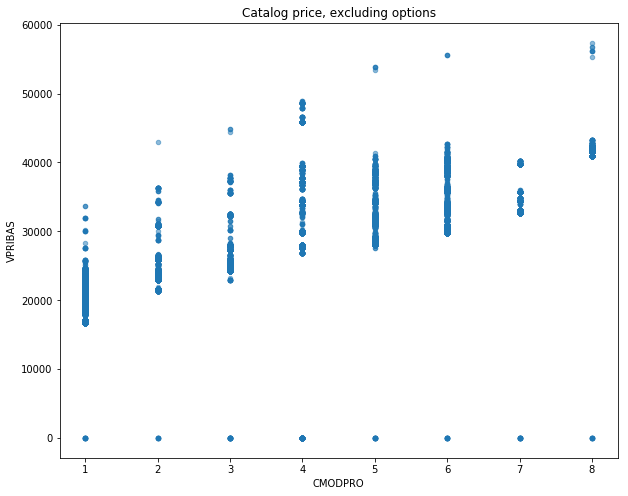

In [107]:
df[df['VPRIBAS']<60000].plot('CMODPRO','VPRIBAS', 'scatter', title='Catalog price, excluding options', alpha=0.5, figsize=(10,8));

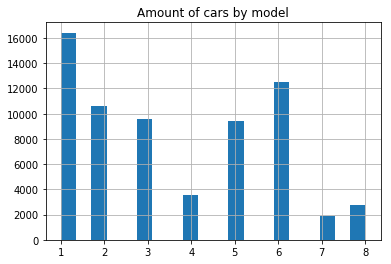

In [108]:
selFld = 'CMODPRO'
plt.show()
plt.title("Amount of cars by model")
df[selFld].hist(bins=20)

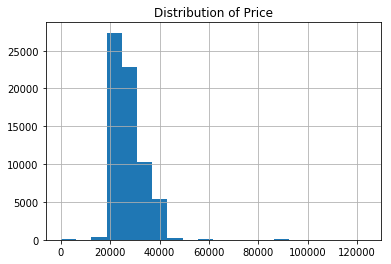

In [109]:
selFld = 'VPRIBAS'
plt.show()
plt.title("Distribution of Price")
df[selFld].hist(bins=20)

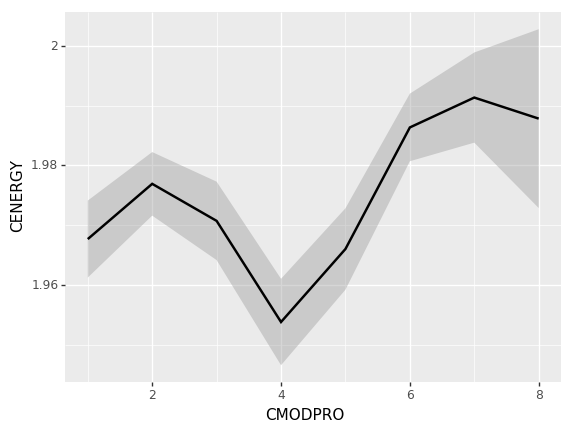

<ggplot: (-9223363244776505996)>

In [115]:
fldSel2 = 'CENERGY'
fldSel = 'CMODPRO'

x_all = get_sample(df[df[fldSel]>-150], 8500)
ggtitle("Energy by Car Mode")
ggplot(x_all, aes(fldSel, fldSel2))+stat_smooth(se=True, method='loess')

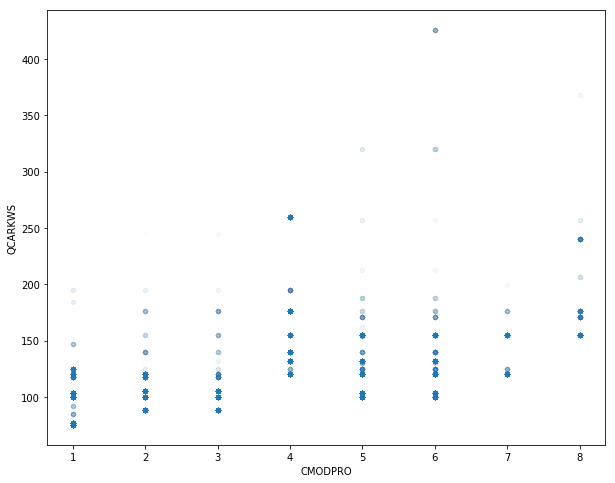

In [187]:
df.plot('CMODPRO','QCARKWS', 'scatter', alpha=0.01, figsize=(10,8));

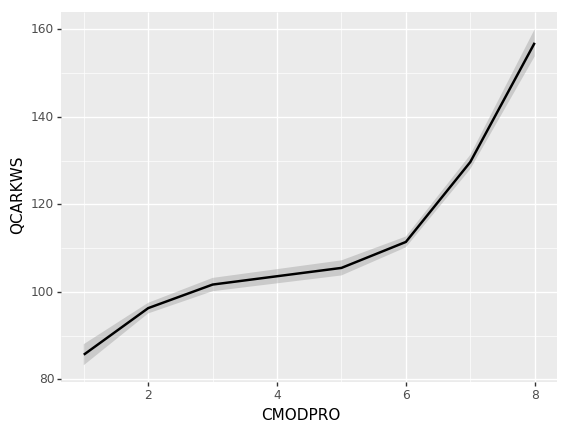

<ggplot: (-9223363247250389956)>

In [175]:
fldSel2 = 'QCARKWS'
fldSel = 'CMODPRO'
x_all = get_sample(X_train[X_train[fldSel]>-150], 1500)
ggplot(x_all, aes(fldSel, fldSel2))+stat_smooth(se=True, method='loess')

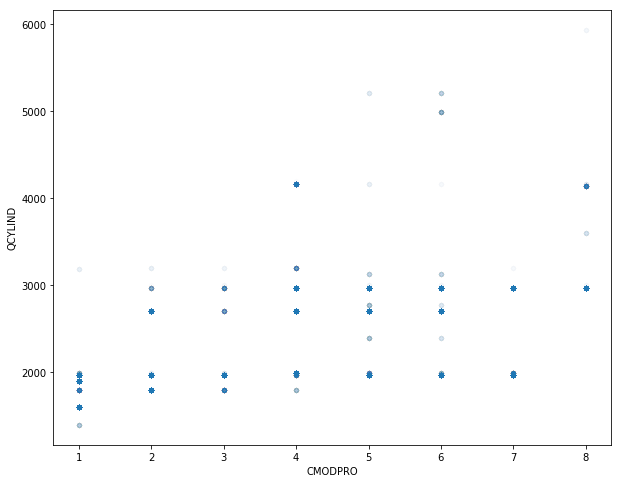

In [188]:
df.plot('CMODPRO','QCYLIND', 'scatter', alpha=0.01, figsize=(10,8));

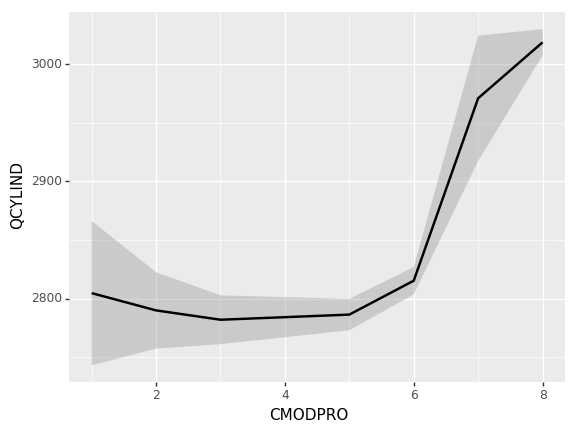

<ggplot: (8789656323462)>

In [190]:
fldSel2 = 'QCYLIND'
fldSel = 'CMODPRO'
x_all = get_sample(X_train[X_train[fldSel2]>2000], 8500)
ggplot(x_all, aes(fldSel, fldSel2))+stat_smooth(se=True, method='loess')

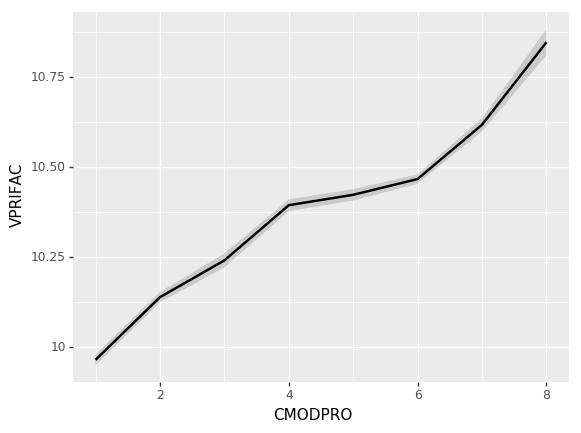

<ggplot: (-9223363247250455222)>

In [179]:
df2, y2, nas2 = proc_df(df_raw, 'VPRIBAS', max_n_cat=7)

fldSel2 = 'VPRIFAC'
fldSel = 'CMODPRO'
x_all = get_sample(df2[df2[fldSel]>-150], 1500)
ggplot(x_all, aes(fldSel, fldSel2))+stat_smooth(se=True, method='loess')